In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# importing libraries for NLP

import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
import re

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Data

In [108]:
data = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Datasets/train_val_df.csv',index_col=0)

### Making a Copy of the Data

In [109]:
data2= data.copy()

In [110]:
data2.head(2)

,clean,complete,comp_stem,comp_lem,summary,sum_stem,sum_lem,labels
0,Juul Labs Inc. will pay $40 million to North C...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,Economy
1,Camila Domonoske An Uber sticker is seen on a ...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,Economy


In [111]:
data2.columns

Index(['clean', 'complete', 'comp_stem', 'comp_lem', 'summary', 'sum_stem',
       'sum_lem', 'labels'],
      dtype='object')

In [112]:
data2.drop(['complete', 'comp_stem', 'comp_lem', 'summary', 'sum_stem','sum_lem'],axis=1, inplace=True)

In [113]:
data2.head()

,clean,labels
0,Juul Labs Inc. will pay $40 million to North C...,Economy
1,Camila Domonoske An Uber sticker is seen on a ...,Economy
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,Economy
3,Rachel Martin talks with economist William Spr...,Economy
4,"Bill Chappell ""We are ready for stores to open...",Economy


### Counting the data

In [114]:
data2.value_counts().sum()

1400

### Checking the information of the data

In [115]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   clean   1400 non-null   object
 1   labels  1400 non-null   object
dtypes: object(2)
memory usage: 32.8+ KB


In [116]:
data2.describe()

,clean,labels
count,1400,1400
unique,1389,7
top,Barry Gordemer Noel King Steve Inskeep Four-ye...,Health
freq,2,200


### Checking for missing data

In [117]:
data2.isnull().sum()

clean     0
labels    0
dtype: int64

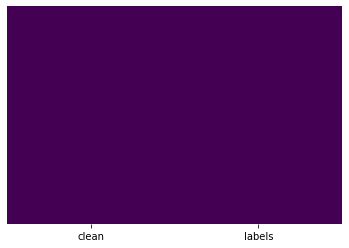

In [118]:
sns.heatmap(data2.isnull(),cmap='viridis',yticklabels=False,cbar=False);

### Dropping missing values

In [119]:
data2.dropna(inplace=True)

In [120]:
data2.isnull().sum()

clean     0
labels    0
dtype: int64

In [121]:
data2.head(3)

,clean,labels
0,Juul Labs Inc. will pay $40 million to North C...,Economy
1,Camila Domonoske An Uber sticker is seen on a ...,Economy
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,Economy


### Checking the column

In [122]:
data2.columns

Index(['clean', 'labels'], dtype='object')

### Checking for blank spaces in `clean`

In [123]:
blankspace = []


for index, clean, labels in data2.itertuples():
    if clean.isspace():
        blankspace.append(index)
    else:
        False
            


In [124]:
print(f""" 
Length of blank spaces : {len(blankspace)}""")

 
Length of blank spaces : 0


### Checking the `Labels`

In [125]:
data2['labels'].value_counts()

Health           200
Economy          200
Environment      200
Technology       200
Entertainment    200
Education        200
Sports           200
Name: labels, dtype: int64

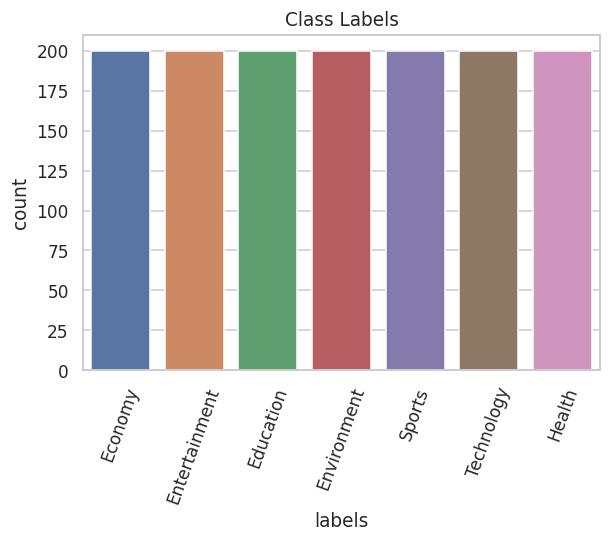

In [126]:
sns.set_theme(style="whitegrid")
plt.figure(dpi = 111)
sns.countplot(x='labels', data= data2)
plt.xticks(rotation=70)
plt.title("Class Labels")
plt.savefig("class_labels.png")

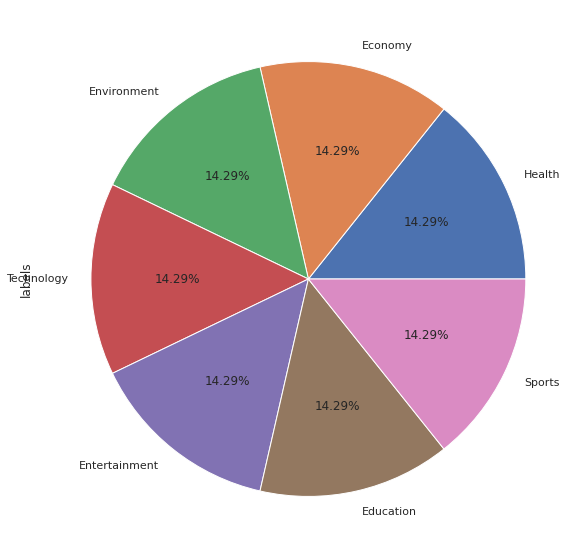

In [127]:

data2['labels'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(16,10))
plt.savefig("Pie_chat.png")

# Exploring the `clean` column

In [128]:
data2.head(3)

,clean,labels
0,Juul Labs Inc. will pay $40 million to North C...,Economy
1,Camila Domonoske An Uber sticker is seen on a ...,Economy
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,Economy


## Creating a new dataframe for  clean

In [129]:
data3 = data2.copy()

In [130]:
data3.sample(5)

,clean,labels
903,Merrit Kennedy U.S. gymnast Simone Biles shown...,Sports
776,Wynne Davis Pink ponds like the one seen here ...,Environment
249,Scott Simon talks to the former football star ...,Entertainment
769,Deepa Shivaram Marine biologist Christopher Ha...,Environment
836,Merrit Kennedy Vanessa Romo Suzanne Nuyen A ve...,Sports


### Getting word count 

In [131]:
data2['word_counts'] = data2['clean'].apply(lambda x: len(str(x).split()))

In [132]:
data2.head()

,clean,labels,word_counts
0,Juul Labs Inc. will pay $40 million to North C...,Economy,836
1,Camila Domonoske An Uber sticker is seen on a ...,Economy,271
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,Economy,801
3,Rachel Martin talks with economist William Spr...,Economy,883
4,"Bill Chappell ""We are ready for stores to open...",Economy,672


### Characters Count

In [133]:
def char_counts(x):
    s = x.split()
    x = ''.join(s)
    return len(x)

In [134]:
data2['char_counts'] = data2['clean'].apply(lambda x: char_counts(str(x)))

In [135]:
data2.head()

,clean,labels,word_counts,char_counts
0,Juul Labs Inc. will pay $40 million to North C...,Economy,836,4320
1,Camila Domonoske An Uber sticker is seen on a ...,Economy,271,1386
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,Economy,801,3988
3,Rachel Martin talks with economist William Spr...,Economy,883,4304
4,"Bill Chappell ""We are ready for stores to open...",Economy,672,3211


### Average word length

In [136]:
data2['avg_word_len'] = data2['char_counts']/data2['word_counts']

In [137]:
data2.head()

,clean,labels,word_counts,char_counts,avg_word_len
0,Juul Labs Inc. will pay $40 million to North C...,Economy,836,4320,5.167464
1,Camila Domonoske An Uber sticker is seen on a ...,Economy,271,1386,5.114391
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,Economy,801,3988,4.978777
3,Rachel Martin talks with economist William Spr...,Economy,883,4304,4.874292
4,"Bill Chappell ""We are ready for stores to open...",Economy,672,3211,4.778274


### Stop Words Count

In [138]:
#stopwords  --> imported from spacy


In [139]:
data2['stop_words_len'] = data2['clean'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [140]:
data2.head()

,clean,labels,word_counts,char_counts,avg_word_len,stop_words_len
0,Juul Labs Inc. will pay $40 million to North C...,Economy,836,4320,5.167464,326
1,Camila Domonoske An Uber sticker is seen on a ...,Economy,271,1386,5.114391,104
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,Economy,801,3988,4.978777,323
3,Rachel Martin talks with economist William Spr...,Economy,883,4304,4.874292,380
4,"Bill Chappell ""We are ready for stores to open...",Economy,672,3211,4.778274,252


### UPPER case words count

In [141]:
data2['upper_case_counts'] = data2['clean'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [142]:
data2.head(5)

,clean,labels,word_counts,char_counts,avg_word_len,stop_words_len,upper_case_counts
0,Juul Labs Inc. will pay $40 million to North C...,Economy,836,4320,5.167464,326,7
1,Camila Domonoske An Uber sticker is seen on a ...,Economy,271,1386,5.114391,104,2
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,Economy,801,3988,4.978777,323,8
3,Rachel Martin talks with economist William Spr...,Economy,883,4304,4.874292,380,31
4,"Bill Chappell ""We are ready for stores to open...",Economy,672,3211,4.778274,252,4


### Checking for URLs

In [143]:
data2['url_flags'] = data['clean'].apply(lambda x: len(re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [144]:
data2[data2['url_flags']>0]

,clean,labels,word_counts,char_counts,avg_word_len,stop_words_len,upper_case_counts,url_flags
40,Bill Chappell A Gol Airlines Boeing 737 Max 8 ...,Economy,479,2449,5.112735,178,8,1
219,Andrew Limbong Conchata Ferrell at the 59th An...,Entertainment,371,1742,4.695418,139,10,1
241,Malaka Gharib Suzanne Nuyen Updated Saturday a...,Entertainment,1499,7471,4.983989,633,19,1
253,Danielle Kurtzleben On July 28 2020 Mattel ann...,Entertainment,1067,5136,4.813496,367,109,1
270,Etelka Lehoczky https://www.fantagraphics.com/...,Entertainment,849,4211,4.959953,358,2,1
429,Clare Lombardo Anya Kamenetz The current wave ...,Education,1143,5932,5.189851,455,8,1
442,"Bill Chappell ""I find that I am bored with any...",Education,979,5191,5.302349,419,18,1
509,John Ydstie This map a screenshot from The Opp...,Education,1499,7872,5.251501,588,8,1
557,Matthew S. Schwartz West Virginia teachers wen...,Education,777,3876,4.988417,311,8,1
630,Dustin Jones Severe thunderstorms struck easte...,Environment,397,2188,5.511335,135,2,1


In [145]:
# Checking how many rows has urls

len(data2[data2['url_flags']>0])

25

### Checking for emails

In [146]:
data2['emails'] = data2['clean'].apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x))

In [147]:
data2.head()

,clean,labels,word_counts,char_counts,avg_word_len,stop_words_len,upper_case_counts,url_flags,emails
0,Juul Labs Inc. will pay $40 million to North C...,Economy,836,4320,5.167464,326,7,0,[]
1,Camila Domonoske An Uber sticker is seen on a ...,Economy,271,1386,5.114391,104,2,0,[]
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,Economy,801,3988,4.978777,323,8,0,[]
3,Rachel Martin talks with economist William Spr...,Economy,883,4304,4.874292,380,31,0,[]
4,"Bill Chappell ""We are ready for stores to open...",Economy,672,3211,4.778274,252,4,0,[]


In [148]:
data2['emails_count'] = data2['emails'].apply(lambda x: len(x))

In [149]:
data2[data2['emails_count']>0]

,clean,labels,word_counts,char_counts,avg_word_len,stop_words_len,upper_case_counts,url_flags,emails,emails_count
94,Janet W. Lee This story is adapted from Life K...,Economy,614,2893,4.711726,264,5,0,[it@npr.org],1
410,Manoush Zomorodi Katie Monteleone Sanaz Meshki...,Education,200,1085,5.425000,70,5,0,[adio@npr.org],1
639,Manoush Zomorodi Katie Monteleone SANAZ MESHKI...,Environment,244,1259,5.159836,85,9,0,[adio@npr.org],1
680,Becky Harlan After scrutinizing nearly every a...,Environment,328,1598,4.871951,126,1,0,[it@npr.org],1
1036,Andee Tagle This story is adapted from Life Ki...,Technology,598,2837,4.744147,257,2,0,[it@npr.org],1
1055,Manoush Zomorodi James Delahoussaye Sanaz Mesh...,Technology,242,1272,5.256198,88,2,0,[adio@npr.org],1
1094,Manoush Zomorodi HARRISON VIJAY TSUI Sanaz Mes...,Technology,198,1049,5.297980,65,7,0,[adio@npr.org],1
1277,"Richard Harris Attendees hold ""We Vape We Vote...",Health,783,4020,5.134100,313,6,0,[rharris@npr.org],1
1280,Richard Harris Pseudomonas aeruginosa bacteria...,Health,1434,7199,5.020223,625,18,0,[rharris@npr.org],1
1281,Richard Harris Alex at 4 years and 11 months o...,Health,1087,5102,4.693652,449,17,0,[rharris@npr.org],1


In [150]:
# Number of rows with emails

len(data2[data2['emails_count']>0])

11

# Visual Analysis of Features

In [152]:
data2.columns

Index(['clean', 'labels', 'word_counts', 'char_counts', 'avg_word_len',
       'stop_words_len', 'upper_case_counts', 'url_flags', 'emails',
       'emails_count'],
      dtype='object')

In [ ]:
# # Let us write a function that will help us create boxplot and histogram for any input numerical
# # variable.
# # This function takes the numerical column as the input and returns the boxplots
# # and histograms for the variable.
# # Let us see if this help us write faster and cleaner code.
# def histogram_boxplot(feature, figsize=(15, 10), bins=None):
#     """Boxplot and histogram combined
#     feature: 1-d feature array
#     figsize: size of fig (default (9,8))
#     bins: number of bins (default None / auto)
#     """
#     f2, (ax_box2, ax_hist2) = plt.subplots(
#         nrows=2,  # Number of rows of the subplot grid= 2
#         sharex=True,  # x-axis will be shared among all subplots
#         gridspec_kw={"height_ratios": (0.25, 0.75)},
#         figsize=figsize,
#     )  # creating the 2 subplots
#     sns.boxplot(
#         feature, ax=ax_box2, showmeans=True, color="violet"
#     )  # boxplot will be created and a star will indicate the mean value of the column
#     sns.distplot(
#         feature, kde=F, ax=ax_hist2, bins=40, palette="winter"
#     ) if bins else sns.distplot(
#         feature, kde=False, ax=ax_hist2
#     )  # For histogram
#     ax_hist2.axvline(
#         np.mean(feature), color="green", linestyle="--"
#     )  # Add mean to the histogram
#     ax_hist2.axvline(
#         np.median(feature), color="black", linestyle="-"
#     )  # Add median to the histogram

In [ ]:
# Observations on Customer_age
# histogram_boxplot(data2["word_counts"])

In [ ]:
# Observations on Customer_age
# histogram_boxplot(data2["avg_word_len"]);

In [ ]:
plt.figure(figsize=(20,20))

sns.barplot(x='labels',y='word_counts',data=data2)
plt.title('Word Counts by Label', fontsize=48)
plt.xticks(fontsize=28, rotation=15)
plt.xlabel('Labels', fontsize=36)
plt.yticks(fontsize=28)
plt.ylim(bottom=600, top=1600)
plt.ylabel('Word Counts', fontsize=36)
# plt.savefig('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Visualizations/Label_WordCounts', transparent=True)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(x='labels',y='avg_word_len',data=data2)
plt.title('Average Word Length by Label', fontsize=48)
plt.xticks(fontsize=28, rotation=15)
plt.xlabel('Labels', fontsize=36)
plt.ylim(bottom=4.7 , top=5)
plt.yticks(ticks=[4.7, 4.8, 4.9, 5.0, 5.1], fontsize=28)
plt.ylabel('Avg Word Length', fontsize=36)
# plt.savefig('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Visualizations/Label_Avg_Wrd_Len', transparent=True)
plt.show()

In [ ]:
# #plot data
# fig, ax = plt.subplots(figsize=(15,7))
# data2.groupby(['word_counts']).count()['labels'].plot(ax=ax)

In [ ]:
samp1 = data2[data2['labels'] == 'Sports']
max_1 = samp1['word_counts'].max()
samp2 = data2[data2['labels'] == 'Entertainment']
max_2 = samp2['word_counts'].max()

plt.figure(figsize=(20,20))
plt.title('Sports and Entertainment', fontsize=48)
sns.kdeplot(data2[data2['labels']=='Sports']['word_counts'], shade=True, color='green',label='Sports')
sns.kdeplot(data2[data2['labels']=='Entertainment']['word_counts'], shade=True, color='red', label='Entertainment')
plt.legend(fontsize='xx-large')
plt.xticks(ticks=range(0,10000,2000), fontsize=28)
plt.xlabel('Word Counts', fontsize=36)
plt.xlim(left=0, right=10000)
plt.axvline(x=max_1, ymax=.25, color='green', linewidth=3)
plt.axvline(x=max_2, ymax=.25, color='red', linewidth=3)
plt.yticks(fontsize=28)
plt.ylabel('Density', fontsize=36)
# plt.savefig('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Visualizations/Sports_v_Entertainment_Word_Counts', transparent=True)
plt.show()

In [ ]:
samp1 = data2[data2['labels'] == 'Economy']
max_1 = samp1['word_counts'].max()
samp2 = data2[data2['labels'] == 'Education']
max_2 = samp2['word_counts'].max()

plt.figure(figsize=(20,20))
plt.title('Economy and Education', fontsize=48)

sns.kdeplot(data2[data2['labels']=='Economy']['word_counts'], shade=True, color='red', label ='Economy')
sns.kdeplot(data2[data2['labels']=='Education']['word_counts'], shade=True, color='green', label='Education')
plt.legend(fontsize='xx-large')
plt.xticks(ticks=range(0,8000,2000), fontsize=28)
plt.xlabel('Word Counts', fontsize=36)
plt.xlim(left=0, right=6000)
plt.axvline(x=max_1, ymax=.25, color='red', linewidth=3 )
plt.axvline(x=max_2, ymax=.25, color='green', linewidth=3)
plt.yticks(fontsize=28)
plt.ylabel('Density', fontsize=36)
# plt.savefig('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Visualizations/Economy_v_Education_Word_Counts', transparent=True)
plt.show()

In [ ]:
# plt.figure(figsize=(12,9))
# plt.title('Entertainment and Education', fontsize=25)

# sns.kdeplot(data2[data2['labels']=='Entertainment']['word_counts'], shade=True, color='magenta', label='Entertainment')
# sns.kdeplot(data2[data2['labels']=='Education']['word_counts'], shade=True, color='blue', label='Education')
# plt.legend()
# plt.savefig('word_counts_class_labels.png')

In [ ]:
# plt.figure(figsize=(12,9))
# plt.title('Economy and Entertainment', fontsize=25)

# sns.kdeplot(data2[data2['labels']=='Economy']['word_counts'], shade=True, color='red', label='Economy')
# sns.kdeplot(data2[data2['labels']=='Entertainment']['word_counts'], shade=True, color='magenta', label='Entertainment')
# plt.legend()
# plt.savefig('word_counts_class_labels.png')

In [ ]:
samp1 = data2[data2['labels'] == 'Economy']
max_1 = samp1['word_counts'].max()
samp2 = data2[data2['labels'] == 'Entertainment']
max_2 = samp2['word_counts'].max()
samp3 = data2[data2['labels'] == 'Education']
max_3 = samp3['word_counts'].max()
samp4 = data2[data2['labels'] == 'Environment']
max_4 = samp4['word_counts'].max()
samp5 = data2[data2['labels'] == 'Sports']
max_5 = samp5['word_counts'].max()
samp6 = data2[data2['labels'] == 'Technology']
max_6 = samp6['word_counts'].max()
samp7 = data2[data2['labels'] == 'Health']
max_7 = samp7['word_counts'].max()


plt.figure(figsize=(20,20))

plt.title('Word Counts of all Labels', fontsize=48)
sns.kdeplot(data2[data2['labels']=='Economy']['word_counts'], shade=True, color='red', label='Economy')
sns.kdeplot(data2[data2['labels']=='Entertainment']['word_counts'], shade=True, color='magenta', label='Entertainment')
sns.kdeplot(data2[data2['labels']=='Education']['word_counts'], shade=True, color='blue', label='Education')
sns.kdeplot(data2[data2['labels']=='Environment']['word_counts'], shade=True, color='yellow', label ='Environment')
sns.kdeplot(data2[data2['labels']=='Sports']['word_counts'], shade=True, color='green', label='Sports')
sns.kdeplot(data2[data2['labels']=='Technology']['word_counts'], shade=True, color='purple',label='Technology')
sns.kdeplot(data2[data2['labels']=='Health']['word_counts'], shade=True, color='skyblue', label='Health')
plt.legend(fontsize='xx-large')
plt.xticks(ticks=range(0,10000,2000), fontsize=28)
plt.xlabel('Word Counts', fontsize=36)
plt.xlim(left=0, right=8000)
plt.axvline(x=max_1, ymax=.25, color='red', linewidth=3)
plt.axvline(x=max_2, ymax=.25, color='magenta', linewidth=3)
plt.axvline(x=max_3, ymax=.25, color='blue', linewidth=3)
plt.axvline(x=max_4, ymax=.25, color='yellow', linewidth=3)
plt.axvline(x=max_5, ymax=.25, color='green', linewidth=3)
plt.axvline(x=max_6, ymax=.25, color='purple', linewidth=3)
plt.axvline(x=max_7, ymax=.25, color='skyblue', linewidth=3)
plt.yticks(fontsize=28)
plt.ylabel('Density', fontsize=36)
# plt.savefig('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Visualizations/All_Label_Word_Counts', transparent=True)
plt.show()

In [ ]:
samp1 = data2[data2['labels'] == 'Economy']
max_1 = samp1['avg_word_len'].mean()
samp2 = data2[data2['labels'] == 'Entertainment']
max_2 = samp2['avg_word_len'].mean()
samp3 = data2[data2['labels'] == 'Education']
max_3 = samp3['avg_word_len'].mean()
samp4 = data2[data2['labels'] == 'Environment']
max_4 = samp4['avg_word_len'].mean()
samp5 = data2[data2['labels'] == 'Sports']
max_5 = samp5['avg_word_len'].mean()
samp6 = data2[data2['labels'] == 'Technology']
max_6 = samp6['avg_word_len'].mean()
samp7 = data2[data2['labels'] == 'Health']
max_7 = samp7['avg_word_len'].mean()

plt.figure(figsize=(20,20))
plt.title('Average Word Length by Label', fontsize=48)
sns.kdeplot(data2[data2['labels']=='Economy']['avg_word_len'], shade=True, color='red', label='Economy')
sns.kdeplot(data2[data2['labels']=='Entertainment']['avg_word_len'], shade=True, color='magenta', label='Entertainment')
sns.kdeplot(data2[data2['labels']=='Education']['avg_word_len'], shade=True, color='blue', label='Education')
sns.kdeplot(data2[data2['labels']=='Environment']['avg_word_len'], shade=True, color='yellow', label ='Environment')
sns.kdeplot(data2[data2['labels']=='Sports']['avg_word_len'], shade=True, color= 'green', label='Sports')
sns.kdeplot(data2[data2['labels']=='Technology']['avg_word_len'], shade=True, color='purple',label='Technology')
sns.kdeplot(data2[data2['labels']=='Health']['avg_word_len'], shade=True, color='skyblue', label='Health')
plt.legend(fontsize='xx-large')
plt.xticks(fontsize=28)
plt.xlabel('Avg Word Length', fontsize=36)
# plt.xlim(left=0, right=8000)
plt.axvline(x=max_1, ymax=.25, color='red', linewidth=3)
plt.axvline(x=max_2, ymax=.25, color='magenta', linewidth=3)
plt.axvline(x=max_3, ymax=.25, color='blue', linewidth=3)
plt.axvline(x=max_4, ymax=.25, color='yellow', linewidth=3)
plt.axvline(x=max_5, ymax=.25, color='green', linewidth=3)
plt.axvline(x=max_6, ymax=.30, color='purple', linewidth=3)
plt.axvline(x=max_7, ymax=.25, color='skyblue', linewidth=3)
plt.yticks(fontsize=28)
plt.ylabel('Density', fontsize=36)
# plt.savefig('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Visualizations/All_Label_Avg_Word_Length', transparent=True)
plt.show()

## Correlation Matrix Table 

In [ ]:
data2.corr()

,word_counts,char_counts,avg_word_len,stop_words_len,upper_case_counts,url_flags,emails_count
word_counts,1.000000,0.995529,-0.273109,0.994093,0.735941,-0.021236,-0.043360
char_counts,0.995529,1.000000,-0.211877,0.982884,0.701153,-0.017668,-0.045196
avg_word_len,-0.273109,-0.211877,1.000000,-0.315561,-0.371655,0.052690,0.034494
stop_words_len,0.994093,0.982884,-0.315561,1.000000,0.743969,-0.025802,-0.041693
upper_case_counts,0.735941,0.701153,-0.371655,0.743969,1.000000,-0.030679,-0.044695
url_flags,-0.021236,-0.017668,0.052690,-0.025802,-0.030679,1.000000,-0.011432
emails_count,-0.043360,-0.045196,0.034494,-0.041693,-0.044695,-0.011432,1.000000


In [ ]:
#Plotting the correlation matrix in the heatmap.
plt.figure(figsize=(15,7))
corr= data2.corr()
sns.heatmap(corr,annot= True,vmin=0,vmax=0.7, cmap='RdYlGn_r')

In [ ]:
data2['labels'].unique()

In [ ]:
data2.head()

In [ ]:
data2.columns

In [ ]:
data2

## Saving clean dataframe `"data2"`

In [160]:
data2.columns

Index(['clean', 'labels', 'word_counts', 'char_counts', 'avg_word_len',
       'stop_words_len', 'upper_case_counts', 'url_flags', 'emails',
       'emails_count'],
      dtype='object')

In [161]:
data2.drop(columns=['stop_words_len', 'upper_case_counts', 'url_flags', 'emails', 'emails_count'], inplace=True)

In [ ]:
data2.head()

In [163]:
data2.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Datasets/clean_word_counts.csv',index=False)

## Creating Wordcloud

In [ ]:
#!pip3 install wordcloud

In [ ]:
import sys
print(sys.executable)

C:\ProgramData\Anaconda3\envs\datascience\python.exe


In [164]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
text = ' '.join(data2['clean'])

In [166]:
len(text)

8084906

In [ ]:
plt.figure(figsize=(20,20))
# plt.title('WordCloud', fontsize=40)
wc = WordCloud(width=1600, height=800).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Full_WordCloud', transparent=True)
plt.show()